In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Here we import the necessary libraries

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Here we are mounting drive to colab in order to easily access the datasets

In [ ]:
!ls "/content/gdrive/My Drive/PRML Dataset/Dataset2"
!ls "/content/gdrive/My Drive/PRML Dataset/Dataset3"

test_23.csv  test_33.csv  train_23.csv	train_33.csv
test_23.csv  train_23.csv


Checking if the mounted grive folder consists of the necessary datasets

In [ ]:
def accuracy(y_pred, y_check):
  mis = 0
  for i in range(len(y_pred)):
    if y_pred[i] != y_check[i]:
      mis += 1
  return (1 - mis/len(y_pred))

def confusion_matrix(y_pred, y_check):
    number = np.unique(np.concatenate((y_check, y_pred)))
    n_classes = len(number)
    cm = np.zeros((n_classes, n_classes),dtype = int)
    for i, label_i in enumerate(number):
        for j, label_j in enumerate(number):
            cm[i, j] = np.sum((y_check == label_i) & (y_pred == label_j))
    return cm

In [ ]:
class KNN:
  X = []
  y = []
  def __init__(self, X, y):
    self.y = y
    self.X = X
  
  def RunTesting(self, X_test, n_neighbours):
    n = n_neighbours
    Y_out = []
    for i in range(len(X_test)):
      dist = []
      for j in range(len(self.X)):
        a = ((X_test[i][0] - self.X[j][0])**2 + (X_test[i][1] - self.X[j][1])**2)**(0.5)
        dist.append([a, j])
      dist.sort()
      ans = 0
      for j in range(n):
        ans += self.y[dist[j][1]]
      ans /= n
      if(ans - int(ans) > 0.5):
        ans = int(ans) + 1
      else:
        ans = int(ans)
      Y_out.append(ans)
    Y_out = np.array(Y_out)
    return Y_out

In [ ]:
a_file = open("/content/gdrive/My Drive/PRML Dataset/Dataset2/train_23.csv", "r")
Input = [(line.strip()).split(',') for line in a_file]
a_file.close()
X = []
Y = []
for i in range(1, len(Input)):
  X.append([])
  for j in range(len(Input[0]) - 1):
    X[i-1].append(float(Input[i][j]))
  X[i-1] = np.array(X[i-1])
  Y.append(int(Input[i][-1]))

X = np.array(X)
Y = np.array(Y)

LR = KNN(X, Y)
#print(LR.RunTesting(X, 1) - Y)
Y_pred = LR.RunTesting(X,1)
print("Accuracy with best model i.e. k=1 is "+str(accuracy(Y_pred,Y)))

Accuracy with best model i.e. k=1 is 1.0


Here we are running a pretty primitive test to check whether our function is correct. We run KNN with k = 1 and check if all predicted values are exactly equal to expected output.
This happens because the closest neighbour to a value is itself

In [ ]:
a_file = open("/content/gdrive/My Drive/PRML Dataset/Dataset2/test_23.csv", "r")
Input = [(line.strip()).split(',') for line in a_file]
a_file.close()
Xs = []
Ys = []
for i in range(1, len(Input)):
  Xs.append([])
  for j in range(len(Input[0]) - 1):
    Xs[i-1].append(float(Input[i][j]))
  Xs[i-1] = np.array(Xs[i-1])
  Ys.append(int(Input[i][-1]))

Xs = np.array(Xs)
Ys = np.array(Ys)


Checking accuracy on testing dataset2

Accuracy for k = 1 is 1.0
Accuracy for k = 2 is 0.99
Accuracy for k = 3 is 0.99
Accuracy for k = 4 is 0.99
Accuracy for k = 5 is 0.99
Accuracy for k = 20 is 0.99
Accuracy for k = 40 is 0.99
Accuracy for k = 60 is 0.99
Accuracy for k = 80 is 0.99
Accuracy for k = 100 is 0.99
Accuracy for k = 120 is 0.99
Accuracy for k = 140 is 0.99
Accuracy for k = 160 is 0.99
Accuracy for k = 180 is 0.99
Accuracy for k = 200 is 0.99
Accuracy for k = 220 is 0.95
Accuracy for k = 240 is 0.36
Accuracy for k = 260 is 0.33999999999999997
Accuracy for k = 280 is 0.32999999999999996
Accuracy for k = 300 is 0.32999999999999996
Accuracy for k = 320 is 0.32999999999999996
Accuracy for k = 340 is 0.32999999999999996
Accuracy for k = 360 is 0.32999999999999996
Accuracy for k = 380 is 0.32999999999999996
Accuracy for k = 400 is 0.32999999999999996



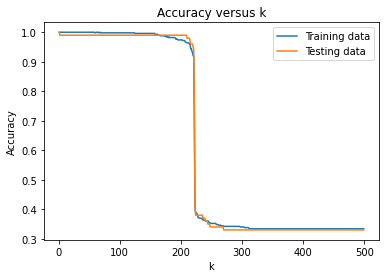

In [ ]:
print("Checking accuracy on testing dataset2\n")
for i in range(1, 6):
  ys_pred = LR.RunTesting(Xs, i)
  print("Accuracy for k = " + str(i) + " is " + str(accuracy(ys_pred, Ys)))
for i in range(1, 21):
  ys_pred = LR.RunTesting(Xs, 20*i)
  print("Accuracy for k = " + str(20*i) + " is " + str(accuracy(ys_pred, Ys)))

k_values = []
train_accuracy= []
test_accuracy= []

for k in range(1, 500):
    ys_pred = LR.RunTesting(Xs,k)
    y_pred = LR.RunTesting(X,k)
    acc1 = accuracy(ys_pred, Ys)
    acc2 = accuracy(y_pred, Y)
    k_values.append(k)
    test_accuracy.append(acc1)
    train_accuracy.append(acc2)

plt.plot(k_values, train_accuracy, label='Training data')
plt.plot(k_values, test_accuracy, label='Testing data')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy versus k')
plt.legend()
print()
plt.show()

Here we can see the accuracy of the model for various values of k from 1 to 5 and then from 20 to 400, the model is fairly accurate until k is nearly 220 where it falls down to 95% and then for even larger k values the model takes a massive dip. 

Plot and confusion matrix for training data with best model i.e. k=1 on dataset 2

The confusion matrix for given data is :


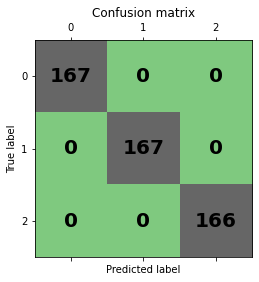


PLOT


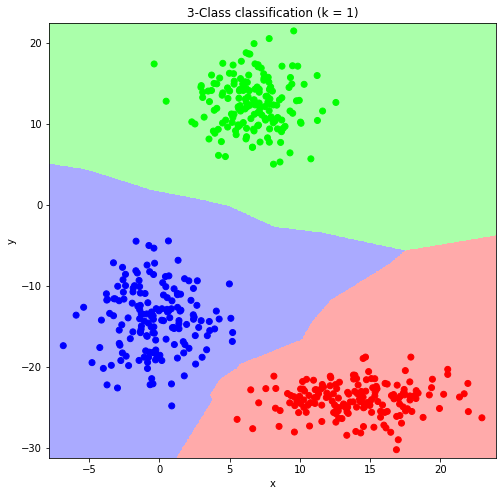

In [ ]:
print("Plot and confusion matrix for training data with best model i.e. k=1 on dataset 2\n")

cm = confusion_matrix(Y_pred,Y)
print("The confusion matrix for given data is :")
#print_arr(cm)
fig,ax = plt.subplots()
im = ax.matshow(cm,cmap='Accent')
max_v = len(cm)
for i in range(max_v):
   for j in range(max_v):
      c = cm[j, i]
      ax.text(i, j, str(c), va='center', ha='center',weight='bold',fontsize=20)
plt.title('Confusion matrix')
#plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

h = 0.05  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))
Z = LR.RunTesting(np.c_[xx.ravel(), yy.ravel()], 1)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)"% (1))
plt.xlabel('x')
plt.ylabel('y')

print("\nPLOT")

plt.show()

Heres the decision boundary that we get for k = 1, Now we will plot the same decision boundary but with the testing data to show why it is 100% accurate

Plot and confusion matrix for testing data with best model i.e. k=1 on dataset 2

The confusion matrix for given data is :


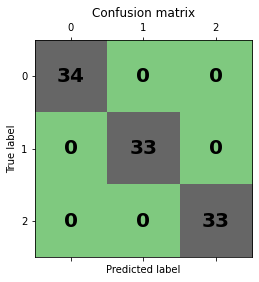


PLOT


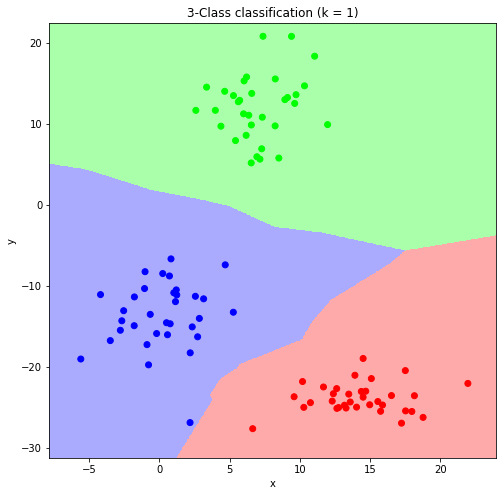

In [ ]:
print("Plot and confusion matrix for testing data with best model i.e. k=1 on dataset 2\n")

Ys_pred = LR.RunTesting(Xs, 1)

cm = confusion_matrix(Ys_pred,Ys)
print("The confusion matrix for given data is :")
#print_arr(cm)
fig,ax = plt.subplots()
im = ax.matshow(cm,cmap='Accent')
max_v = len(cm)
for i in range(max_v):
   for j in range(max_v):
      c = cm[j, i]
      ax.text(i, j, str(c), va='center', ha='center',weight='bold',fontsize=20)
plt.title('Confusion matrix')
#plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

h = 0.05  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))
Z = LR.RunTesting(np.c_[xx.ravel(), yy.ravel()], 1)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(Xs[:, 0], Xs[:, 1], c=Ys, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)"% (1))
plt.xlabel('x')
plt.ylabel('y')

print("\nPLOT")

plt.show()

As we can see all the test data falls in its corresponding decision boundary for each test sample. Hence the accuracy is 100%.

In [ ]:
a_file = open("/content/gdrive/My Drive/PRML Dataset/Dataset3/train_23.csv", "r")
Input = [(line.strip()).split(',') for line in a_file]
a_file.close()
X = []
Y = []
for i in range(1, len(Input)):
  X.append([])
  for j in range(len(Input[0]) - 1):
    X[i-1].append(float(Input[i][j]))
  X[i-1] = np.array(X[i-1])
  Y.append(int(Input[i][-1]))

X = np.array(X)
Y = np.array(Y)

LR = KNN(X, Y)
Y_pred = LR.RunTesting(X,1)
print("Accuracy with best model i.e. k=1 is "+str(accuracy(Y_pred,Y)))

Accuracy with best model i.e. k=1 is 1.0


In [ ]:
a_file = open("/content/gdrive/My Drive/PRML Dataset/Dataset3/test_23.csv", "r")
Input = [(line.strip()).split(',') for line in a_file]
a_file.close()
Xs = []
Ys = []
for i in range(1, len(Input)):
  Xs.append([])
  for j in range(len(Input[0]) - 1):
    Xs[i-1].append(float(Input[i][j]))
  Xs[i-1] = np.array(Xs[i-1])
  Ys.append(int(Input[i][-1]))

Xs = np.array(Xs)
Ys = np.array(Ys)


Checking accuracy on testing dataset3

Accuracy for k = 1 is 1.0
Accuracy for k = 2 is 0.99
Accuracy for k = 3 is 0.98
Accuracy for k = 4 is 0.99
Accuracy for k = 5 is 1.0
Accuracy for k = 20 is 1.0
Accuracy for k = 40 is 0.99
Accuracy for k = 60 is 0.99
Accuracy for k = 80 is 0.98
Accuracy for k = 100 is 0.96
Accuracy for k = 120 is 0.96
Accuracy for k = 140 is 0.9299999999999999
Accuracy for k = 160 is 0.92
Accuracy for k = 180 is 0.89
Accuracy for k = 200 is 0.89
Accuracy for k = 220 is 0.88
Accuracy for k = 240 is 0.85
Accuracy for k = 260 is 0.84
Accuracy for k = 280 is 0.81
Accuracy for k = 300 is 0.78
Accuracy for k = 320 is 0.76
Accuracy for k = 340 is 0.76
Accuracy for k = 360 is 0.74
Accuracy for k = 380 is 0.73
Accuracy for k = 400 is 0.72



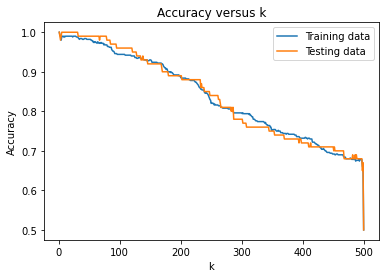

In [ ]:
print("Checking accuracy on testing dataset3\n")
for i in range(1, 6):
  y_pred = LR.RunTesting(Xs, i)
  print("Accuracy for k = " + str(i) + " is " + str(accuracy(y_pred, Ys)))
for i in range(1, 21):
  y_pred = LR.RunTesting(Xs, 20*i)
  print("Accuracy for k = " + str(20*i) + " is " + str(accuracy(y_pred, Ys)))

k_values = []
train_accuracy= []
test_accuracy= []

for k in range(1, 501):
    ys_pred = LR.RunTesting(Xs,k)
    y_pred = LR.RunTesting(X,k)
    acc1 = accuracy(ys_pred, Ys)
    acc2 = accuracy(y_pred, Y)
    k_values.append(k)
    test_accuracy.append(acc1)
    train_accuracy.append(acc2)

plt.plot(k_values, train_accuracy, label='Training data')
plt.plot(k_values, test_accuracy, label='Testing data')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy versus k')
plt.legend()
print()
plt.show()

Again we see that the accuracy is 100% for k = 1 but in this case the accuracy is 100% for values != 1 as well. Also contrary to last time there is a gradual decrease in performance as k increases from 20.

Plot and confusion matrix for training data with best model i.e. k=1 on dataset 2

The confusion matrix for given data is :


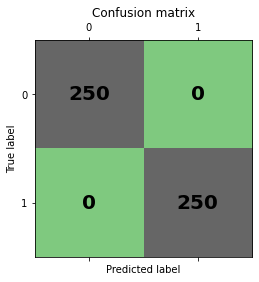


PLOT


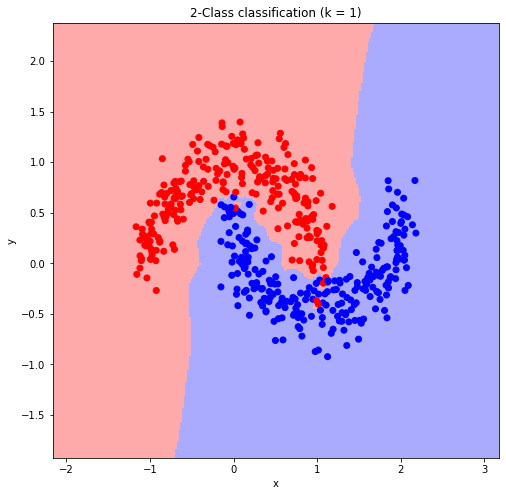

In [ ]:
print("Plot and confusion matrix for training data with best model i.e. k=1 on dataset 2\n")

cm = confusion_matrix(Y_pred,Y)
print("The confusion matrix for given data is :")
#print_arr(cm)
fig,ax = plt.subplots()
im = ax.matshow(cm,cmap='Accent')
max_v = len(cm)
for i in range(max_v):
   for j in range(max_v):
      c = cm[j, i]
      ax.text(i, j, str(c), va='center', ha='center',weight='bold',fontsize=20)
plt.title('Confusion matrix')
#plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))
Z = LR.RunTesting(np.c_[xx.ravel(), yy.ravel()], 1)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i)"% (1))
plt.xlabel('x')
plt.ylabel('y')

print("\nPLOT")
plt.show()

Plot and confusion matrix for training data with best model i.e. k=1 on dataset 2

The confusion matrix for given data is :


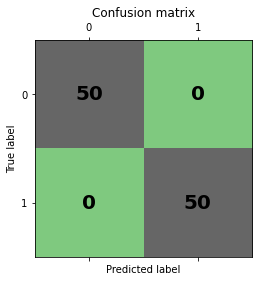


PLOT


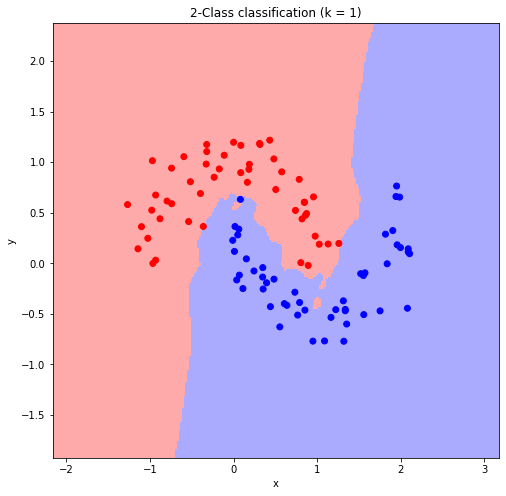

In [ ]:
print("Plot and confusion matrix for training data with best model i.e. k=1 on dataset 2\n")

Ys_pred = LR.RunTesting(Xs, 1)

cm = confusion_matrix(Ys_pred,Ys)
print("The confusion matrix for given data is :")
#print_arr(cm)
fig,ax = plt.subplots()
im = ax.matshow(cm,cmap='Accent')
max_v = len(cm)
for i in range(max_v):
   for j in range(max_v):
      c = cm[j, i]
      ax.text(i, j, str(c), va='center', ha='center',weight='bold',fontsize=20)
plt.title('Confusion matrix')
#plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))
Z = LR.RunTesting(np.c_[xx.ravel(), yy.ravel()], 1)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(Xs[:, 0], Xs[:, 1], c=Ys, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i)"% (1))
plt.xlabel('x')
plt.ylabel('y')

print("\nPLOT")
plt.show()


Even here we can see that every test sample is still inside the test boundary. For some uniqueness we will also plot the data for k = 20

Plot and confusion matrix for training data with k=20 on dataset 2

The confusion matrix for given data is :


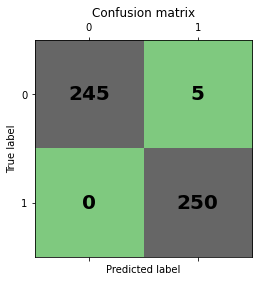


PLOT


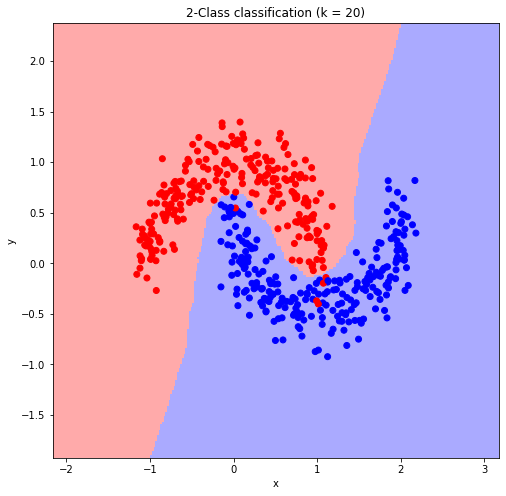

In [ ]:
print("Plot and confusion matrix for training data with k=20 on dataset 2\n")

Y_pred20 = LR.RunTesting(X, 20)

cm = confusion_matrix(Y_pred20,Y)
print("The confusion matrix for given data is :")
#print_arr(cm)
fig,ax = plt.subplots()
im = ax.matshow(cm,cmap='Accent')
max_v = len(cm)
for i in range(max_v):
   for j in range(max_v):
      c = cm[j, i]
      ax.text(i, j, str(c), va='center', ha='center',weight='bold',fontsize=20)
plt.title('Confusion matrix')
#plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))
Z = LR.RunTesting(np.c_[xx.ravel(), yy.ravel()], 20)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i)"% (20))
plt.xlabel('x')
plt.ylabel('y')

print("\nPLOT")
plt.show()

Plot and confusion matrix for testing data with k=20 on dataset 2

The confusion matrix for given data is :


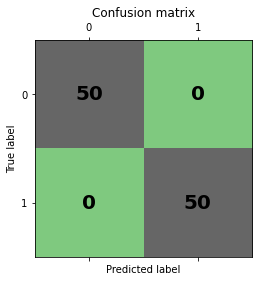


PLOT


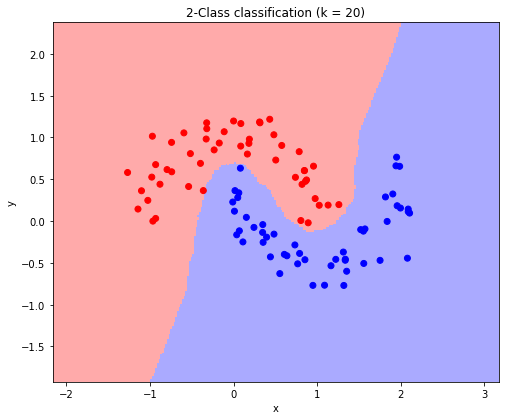

In [ ]:
print("Plot and confusion matrix for testing data with k=20 on dataset 2\n")

Ys_pred20 = LR.RunTesting(Xs, 1)

cm = confusion_matrix(Ys_pred20,Ys)
print("The confusion matrix for given data is :")
#print_arr(cm)
fig,ax = plt.subplots()
im = ax.matshow(cm,cmap='Accent')
max_v = len(cm)
for i in range(max_v):
   for j in range(max_v):
      c = cm[j, i]
      ax.text(i, j, str(c), va='center', ha='center',weight='bold',fontsize=20)
plt.title('Confusion matrix')
#plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))
Z = LR.RunTesting(np.c_[xx.ravel(), yy.ravel()], 20)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(Xs[:, 0], Xs[:, 1], c=Ys, cmap=cmap_bold)
plt.axis('square')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i)"% (20))
plt.xlabel('x')
plt.ylabel('y')

print("\nPLOT")
plt.show()

Here it is more clear that each sample is in the given decision boundary